In [ ]:
import pandas as pd
import numpy as np

In [ ]:
mydata = ['Boat', 'Car', 'Bike', 'Truck']
myseries = pd.Series(mydata)

In [ ]:
print(myseries)

### DataFrame

In [ ]:
mydfdata = [('Boat', 1), ('Car', 55), ('Bike', 99), ('Truck', 43)]
mydf = pd.DataFrame(mydfdata, columns=['thing', 'count'])
mydf

In [ ]:
type(mydf['thing'])

In [ ]:
mydf.dtypes

### Reading in Data

In [ ]:
df = pd.read_csv('./data/Mrbeast_stats.csv')

#### Inspect The Data

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.dtypes

In [ ]:
df.describe()

### Columns and Rows

In [ ]:
df['viewCount']

In [ ]:
df.loc[4]

In [ ]:
df = df.set_index('id')

In [ ]:
df

In [ ]:
df.loc['cExLQ1o2pDw']

### Subsetting Data

In [ ]:
# Subsetting Columns
df = df[['title', 'description', 'publishTime', 
        'duration_seconds', 'viewCount', 'likeCount', 
        'commentCount']]

In [ ]:
df.shape

In [ ]:
# Subsetting Rows

In [ ]:
# Subsetting using loc
df.loc[df['viewCount'] > 1_000_000]

In [ ]:
df.query('viewCount > 1000000')

In [ ]:
# Drop rows that has no values
df = df.loc[~df['likeCount'].isna()]

### Casting dtypes

In [ ]:
df['viewCount'] = df['viewCount'].astype('int')
df['likeCount'] = df['likeCount'].astype('int')

In [ ]:
df['publishTime'] = pd.to_datetime(df['publishTime']) 

In [26]:
df['likeCount'] = pd.to_numeric(df['likeCount'].astype('str'))

### Creating New Column

In [29]:
df['like_to_view_ratio'] = df['likeCount'] / df['viewCount']

In [ ]:
df.head()

### Adding New Row

In [ ]:
df_to_append =  df.tail(1)

In [35]:
df_concat = pd.concat([df.tail(), df_to_append])

### Plot Examples

<Axes: title={'center': 'Distribution of view Count'}, ylabel='Frequency'>

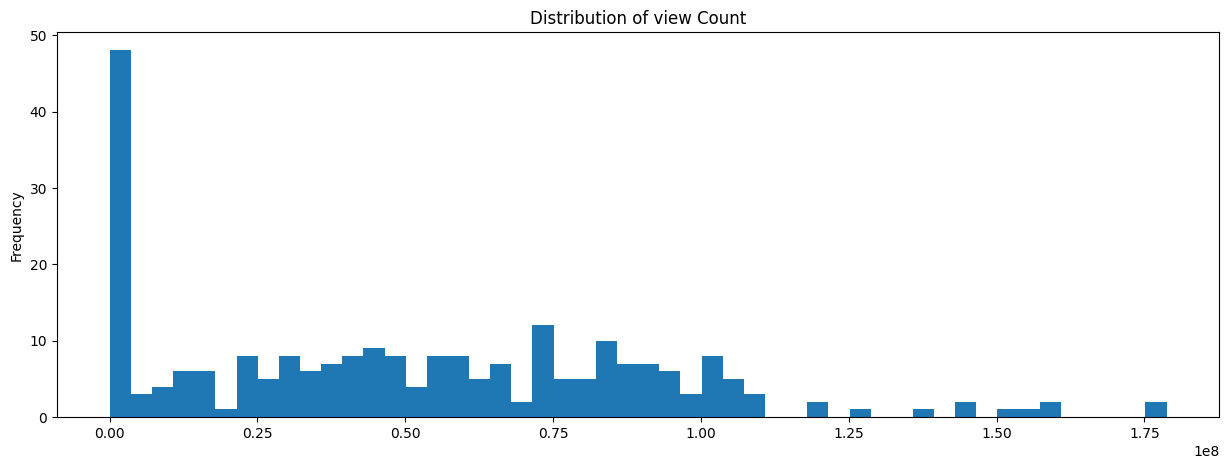

In [41]:
df['viewCount'].plot(kind='hist', bins=50, 
                     title='Distribution of view Count',
                     figsize=(15,5))

<Axes: title={'center': 'Views vs Like Count'}, xlabel='viewCount', ylabel='likeCount'>

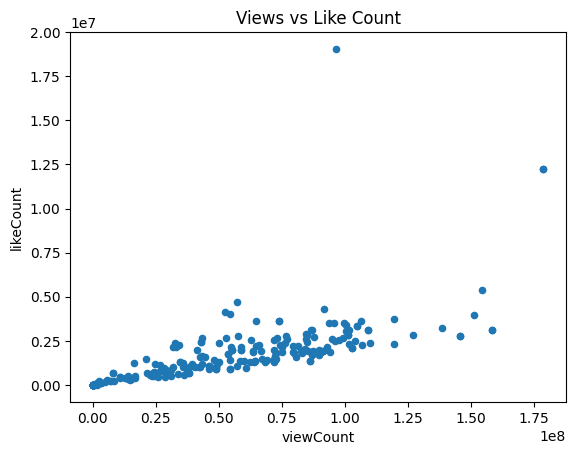

In [43]:
df.plot(kind='scatter', x='viewCount', y='likeCount', title='Views vs Like Count')

### Save our output

In [45]:
df.to_csv('processed_data.csv')